In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("bank_real.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Checking the null values 

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# No null Values 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Checking for Outlier in numerical variable 

In [8]:
y_dep = data["y"]

In [9]:
y_dep

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [10]:
data = data.drop("y",1)

C:\Users\KHANNC~1\AppData\Local\Temp/ipykernel_14488/1086682729.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop("y",1)


In [11]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


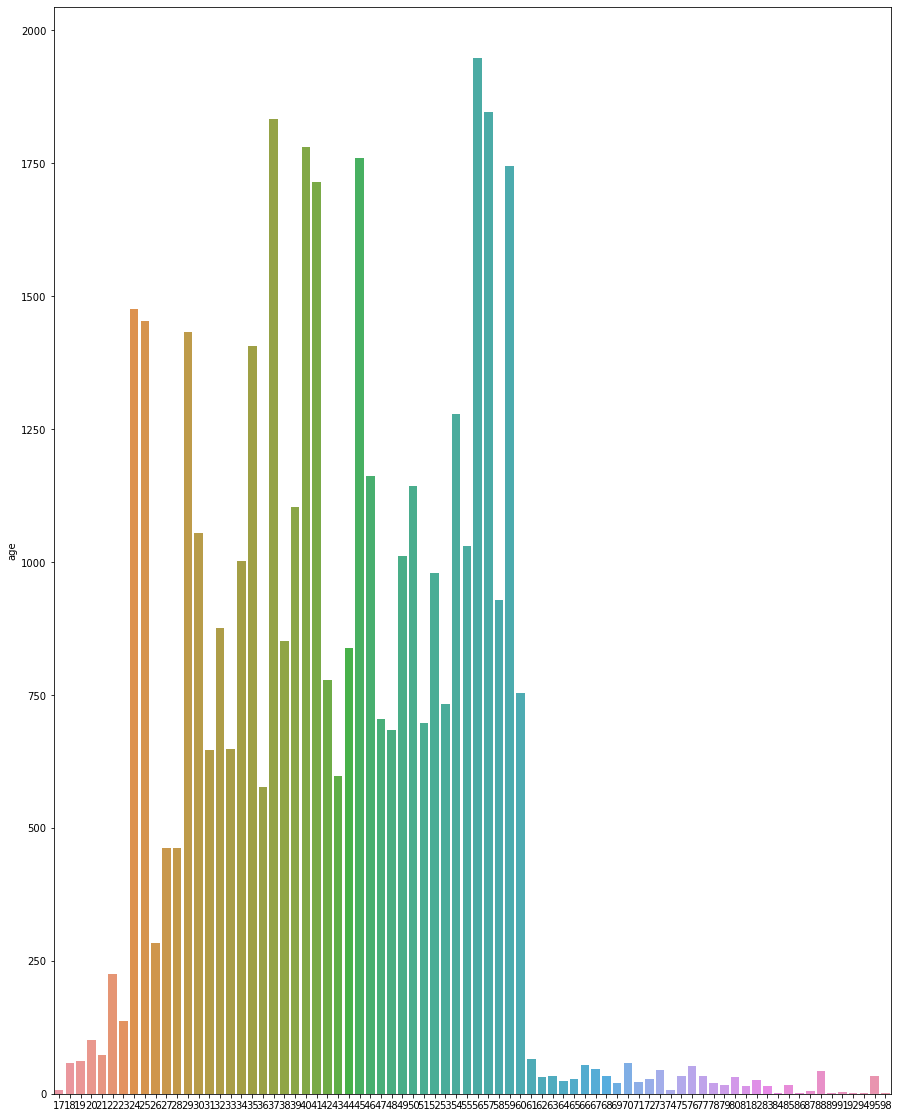

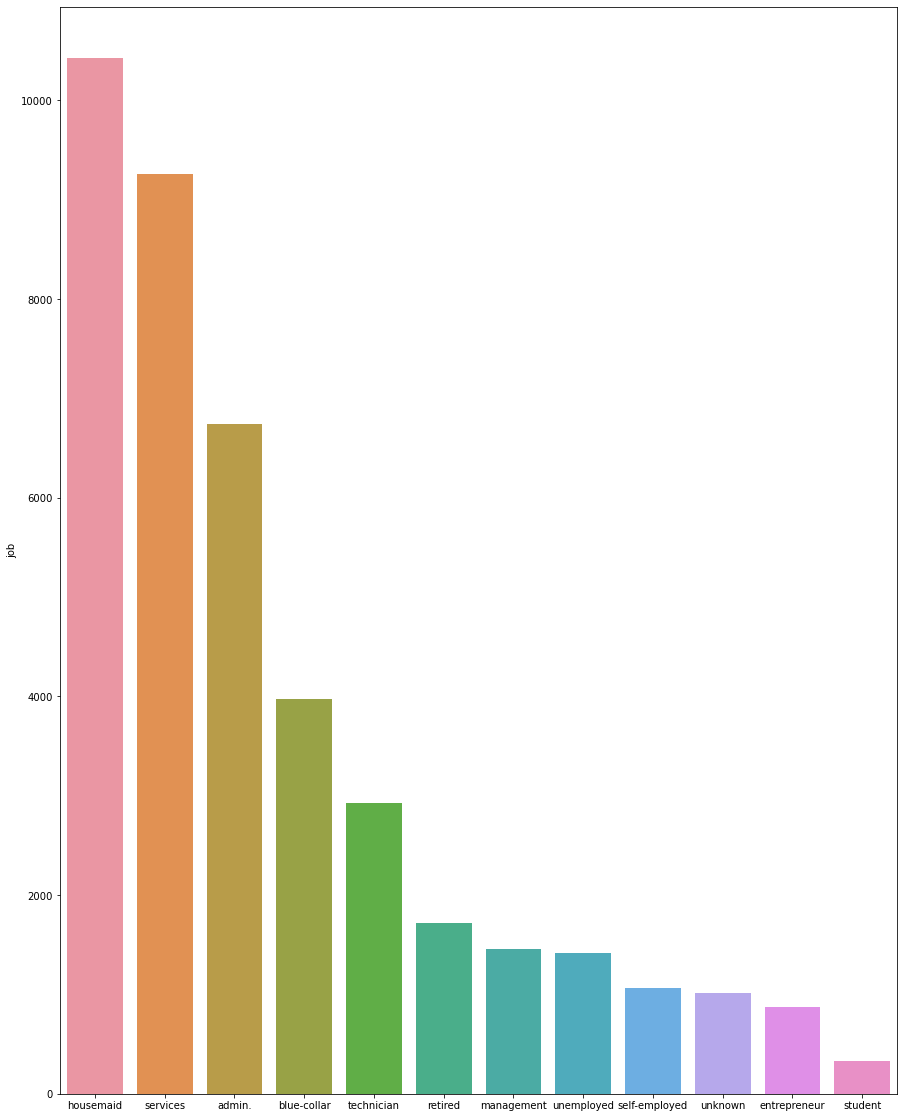

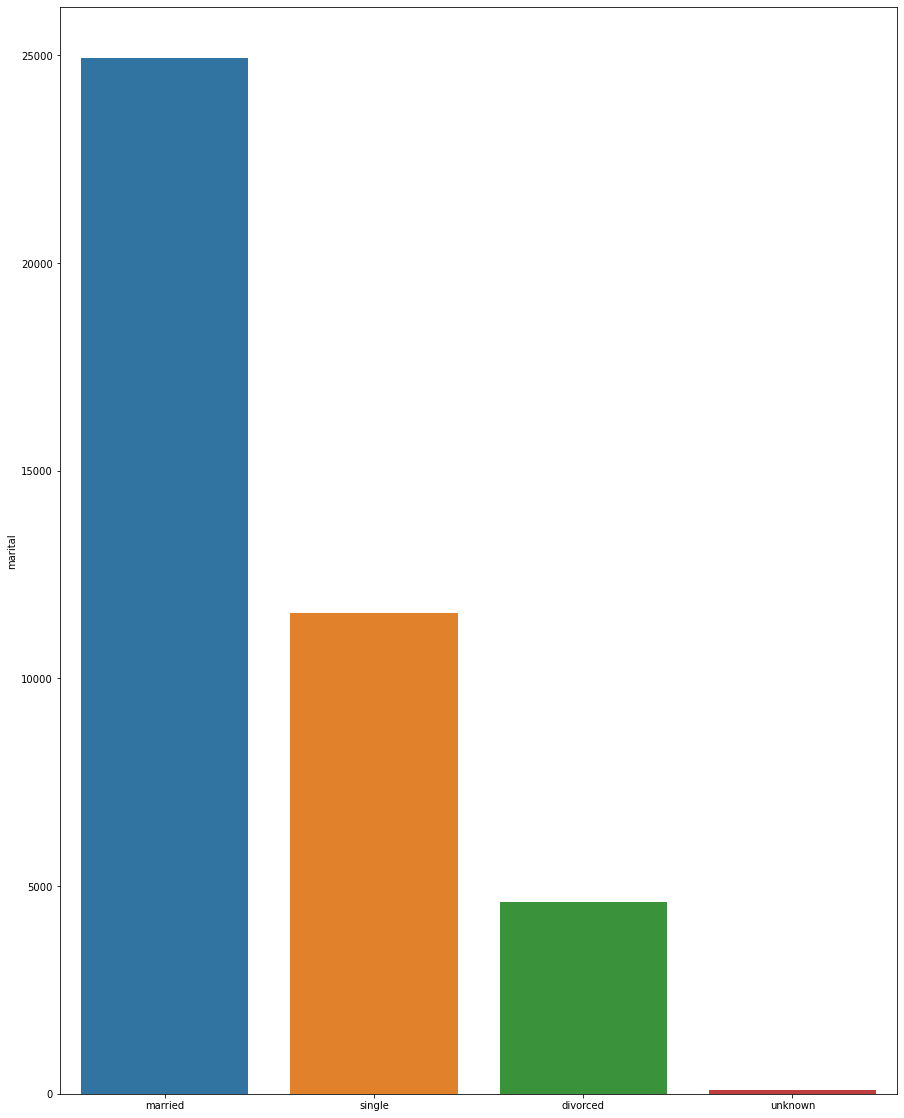

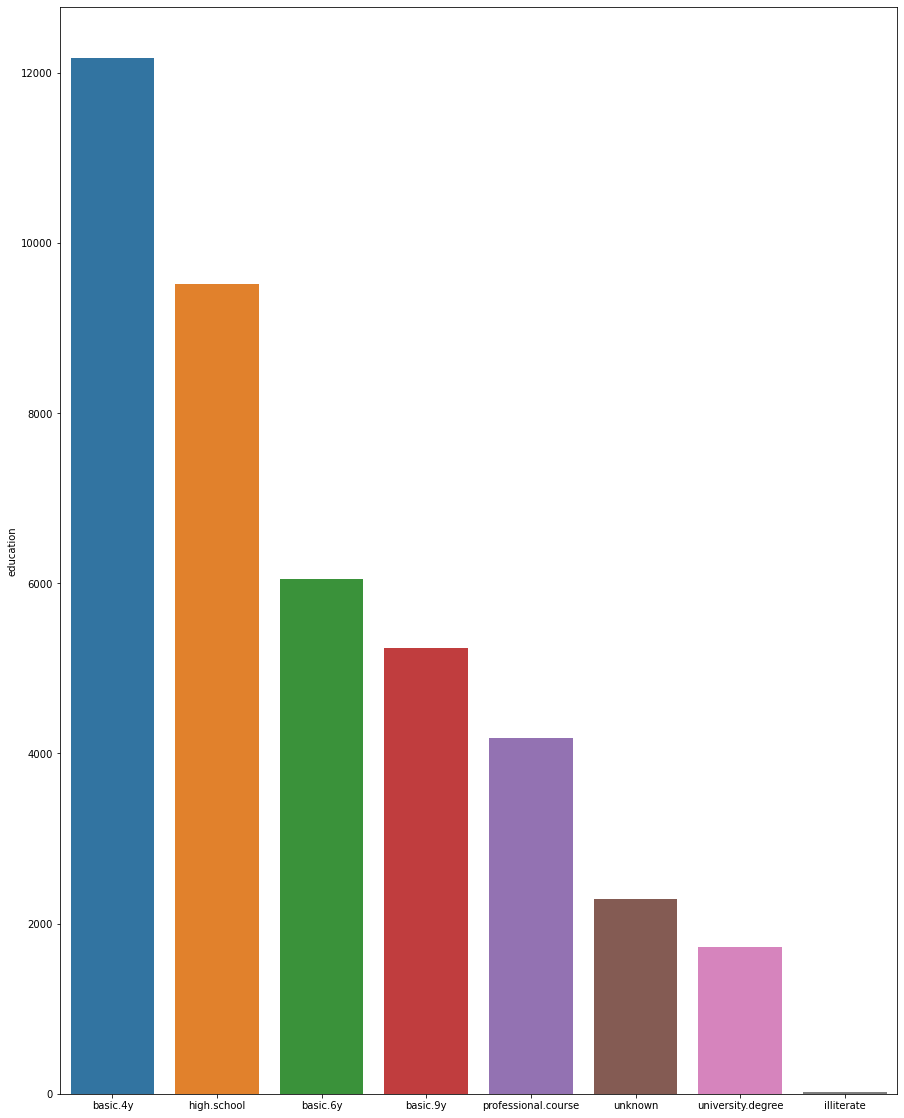

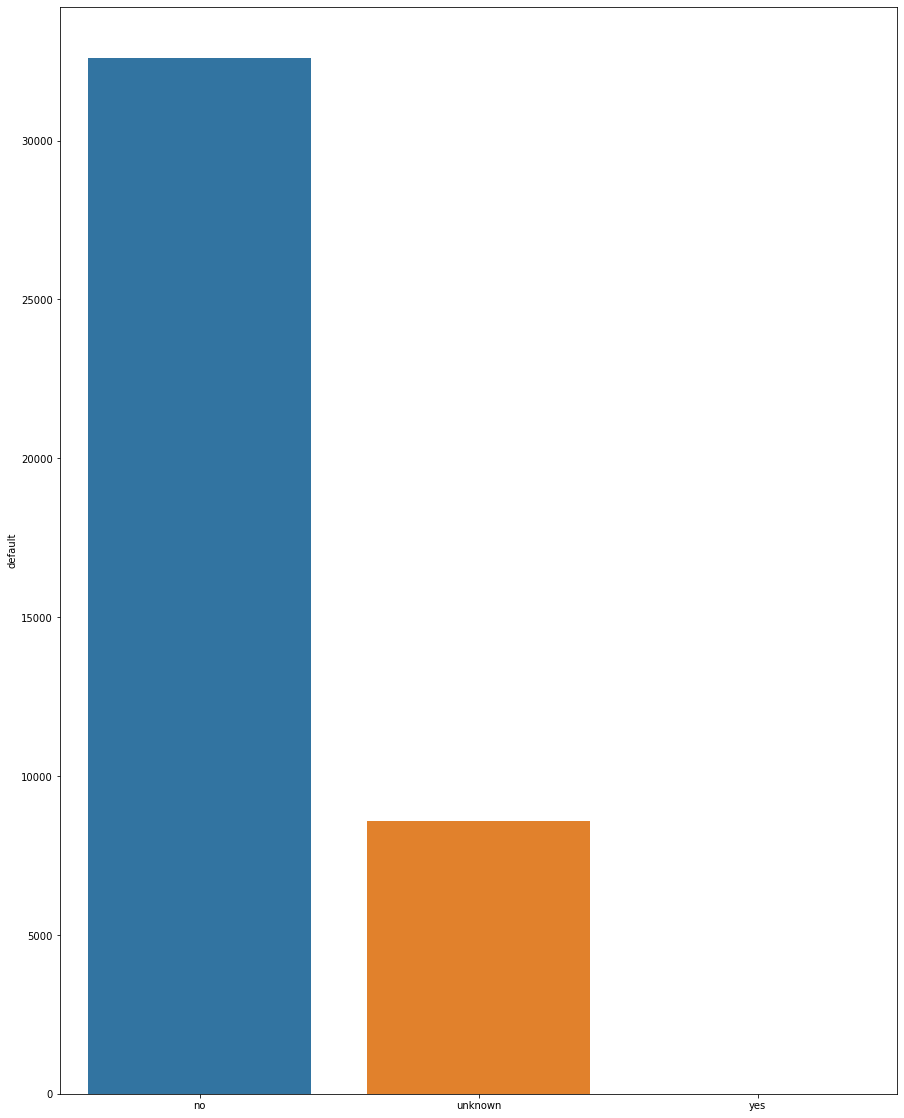

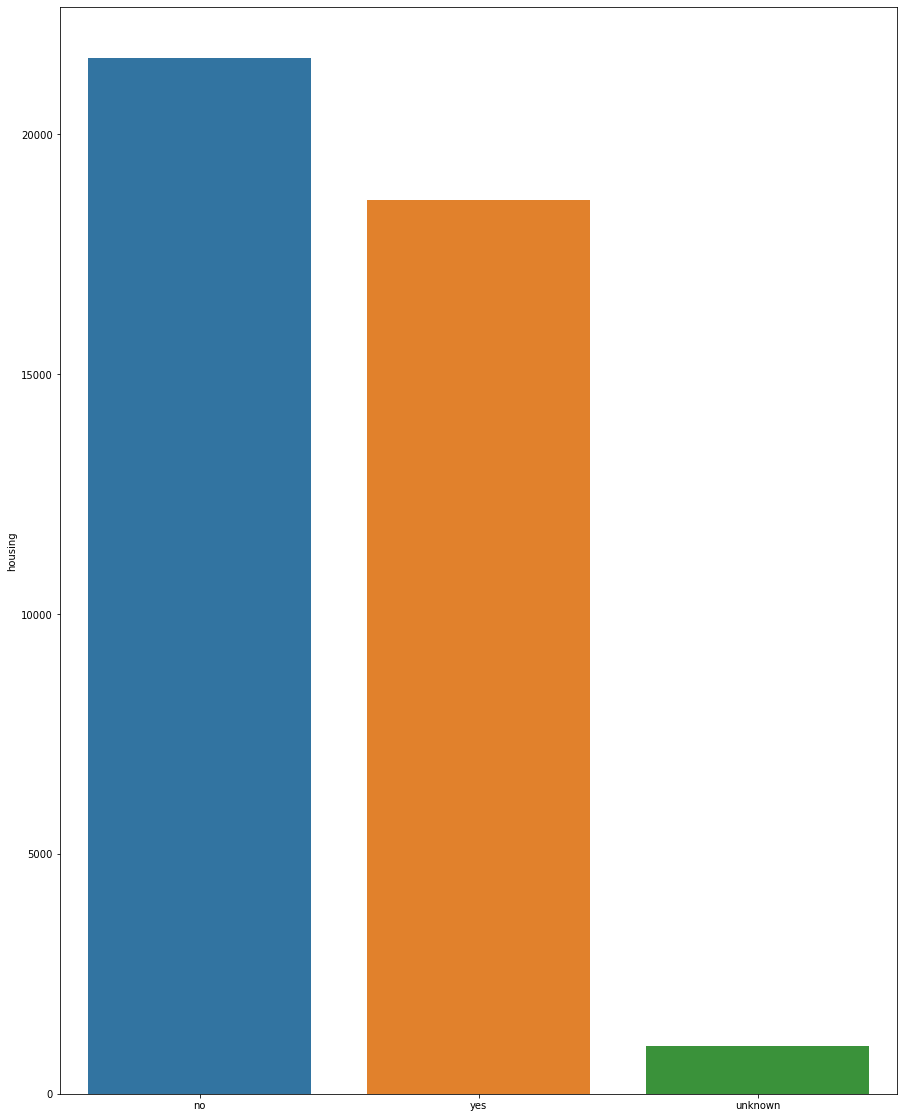

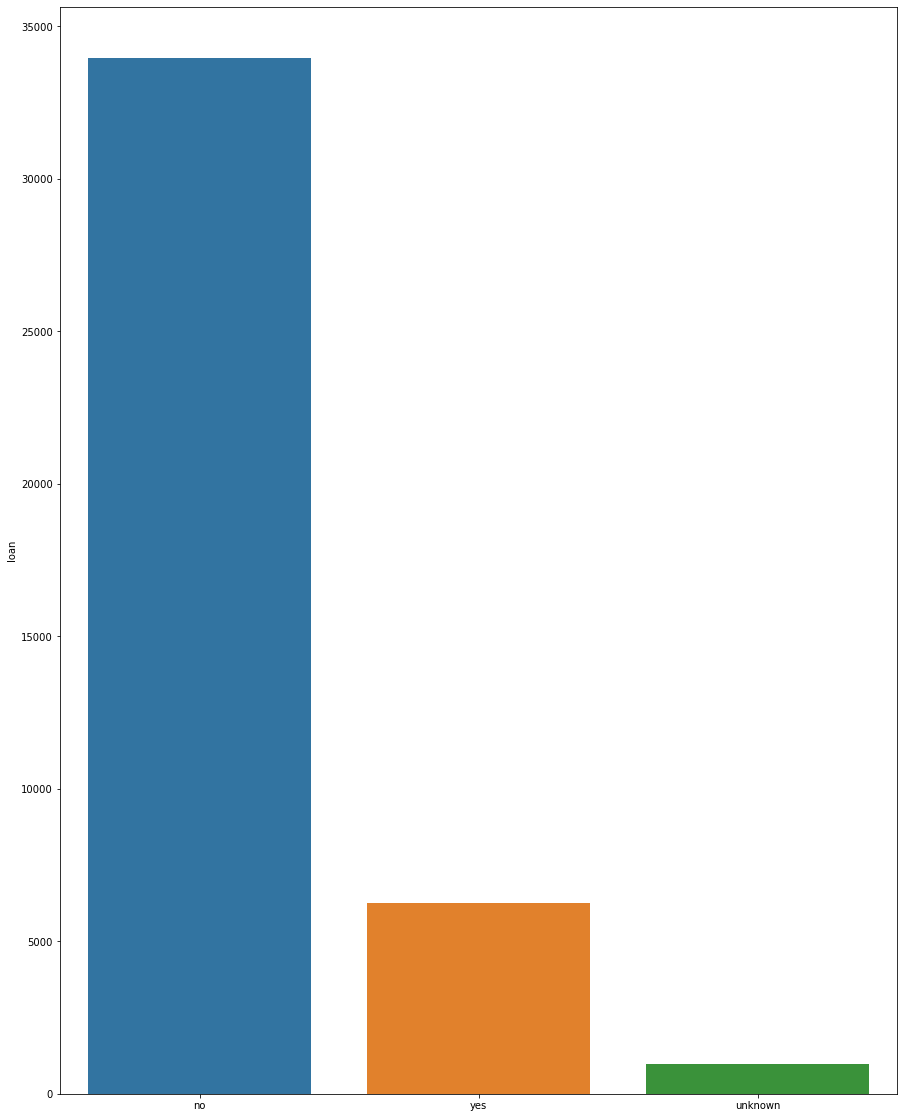

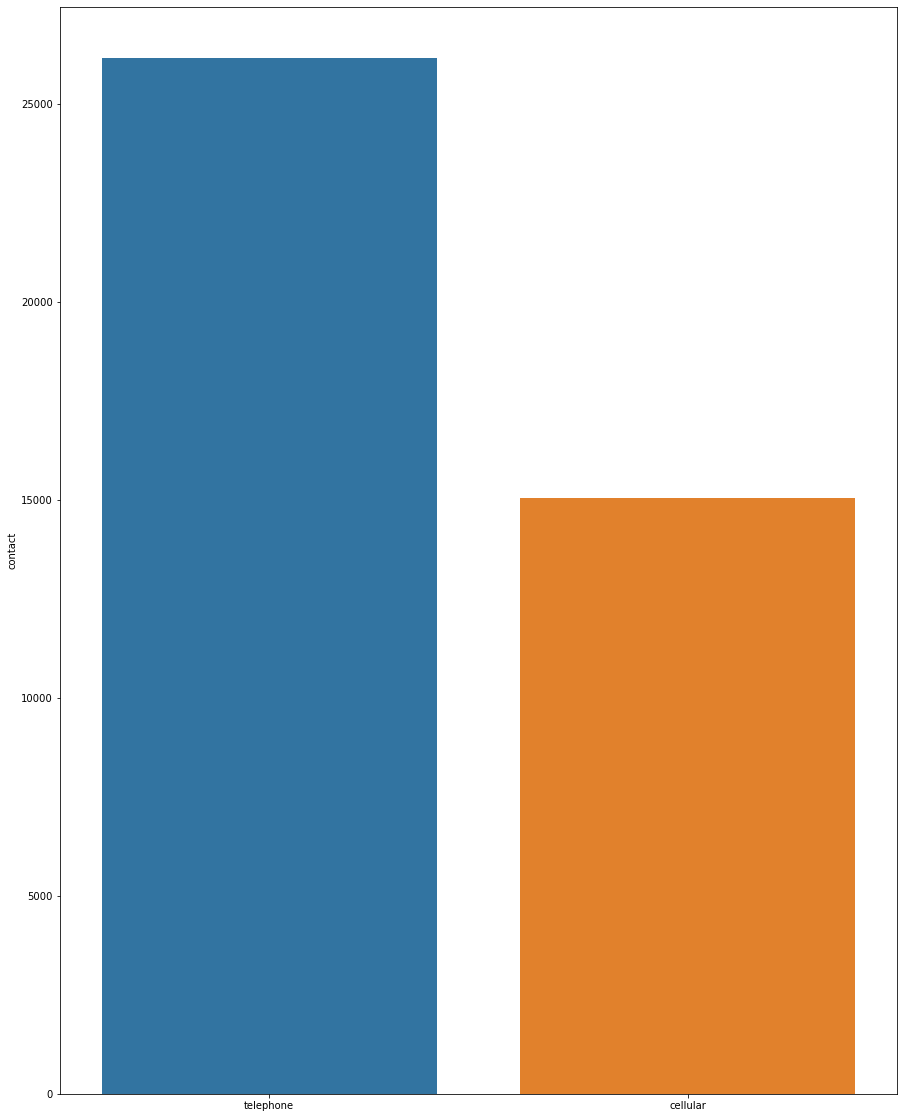

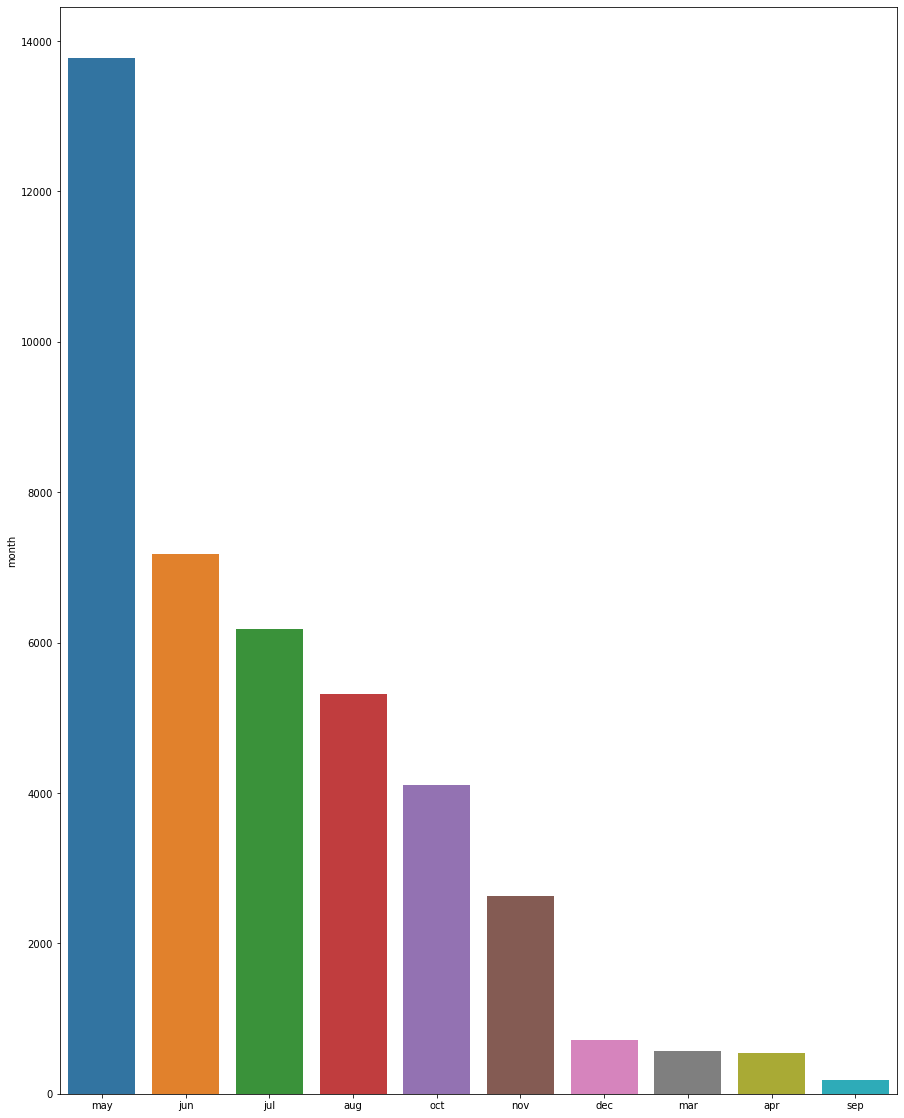

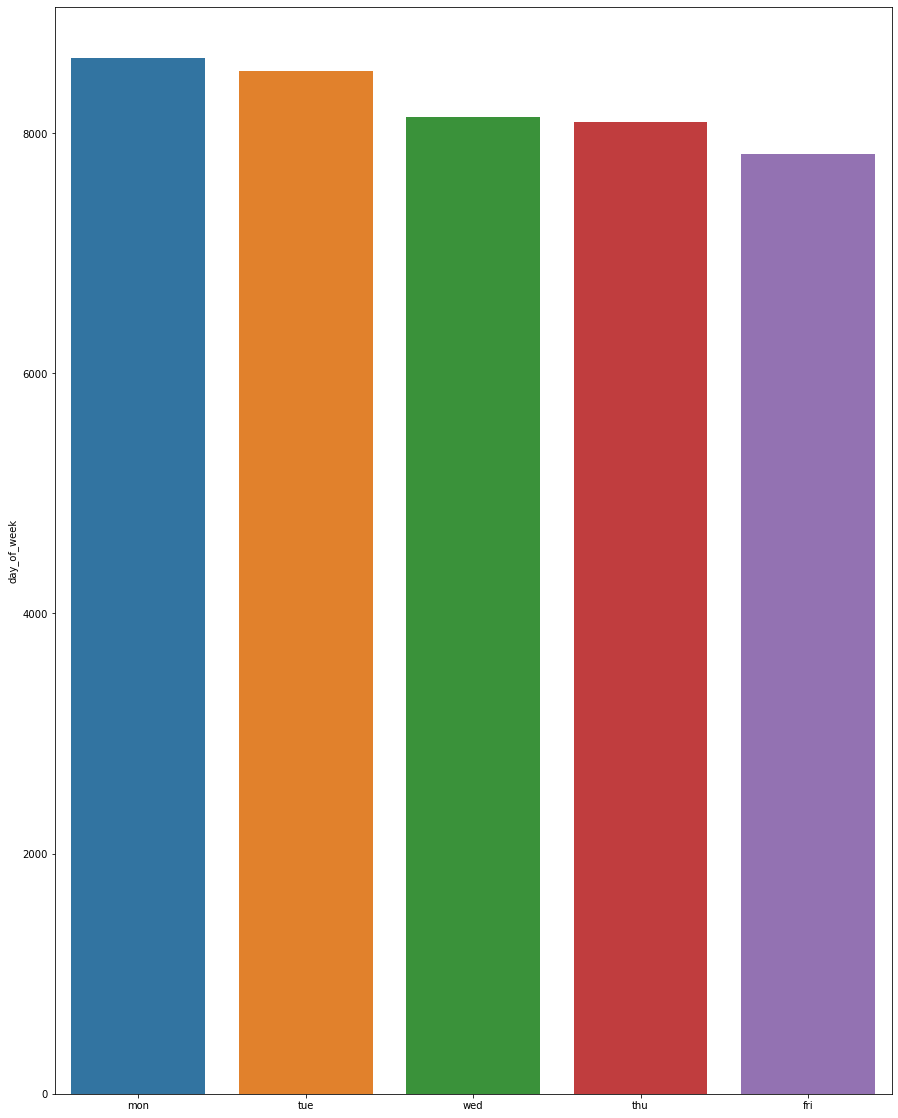

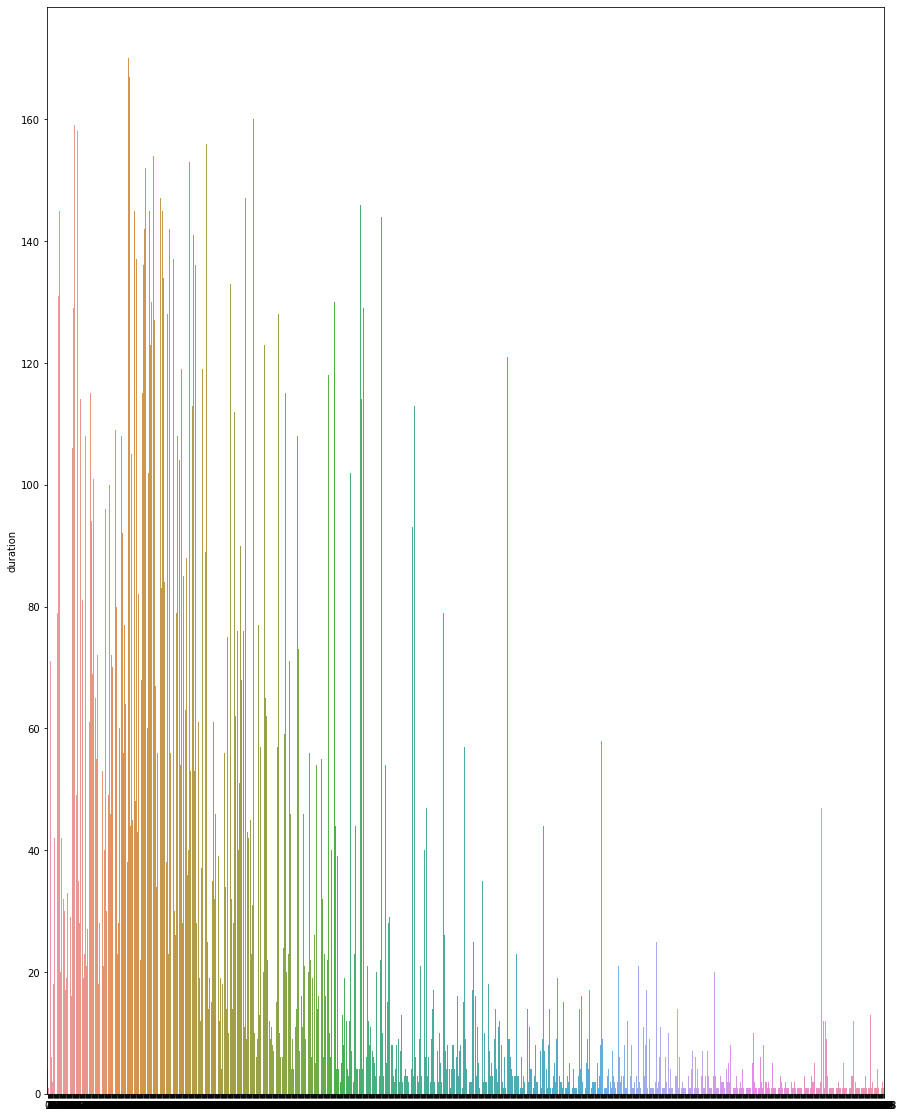

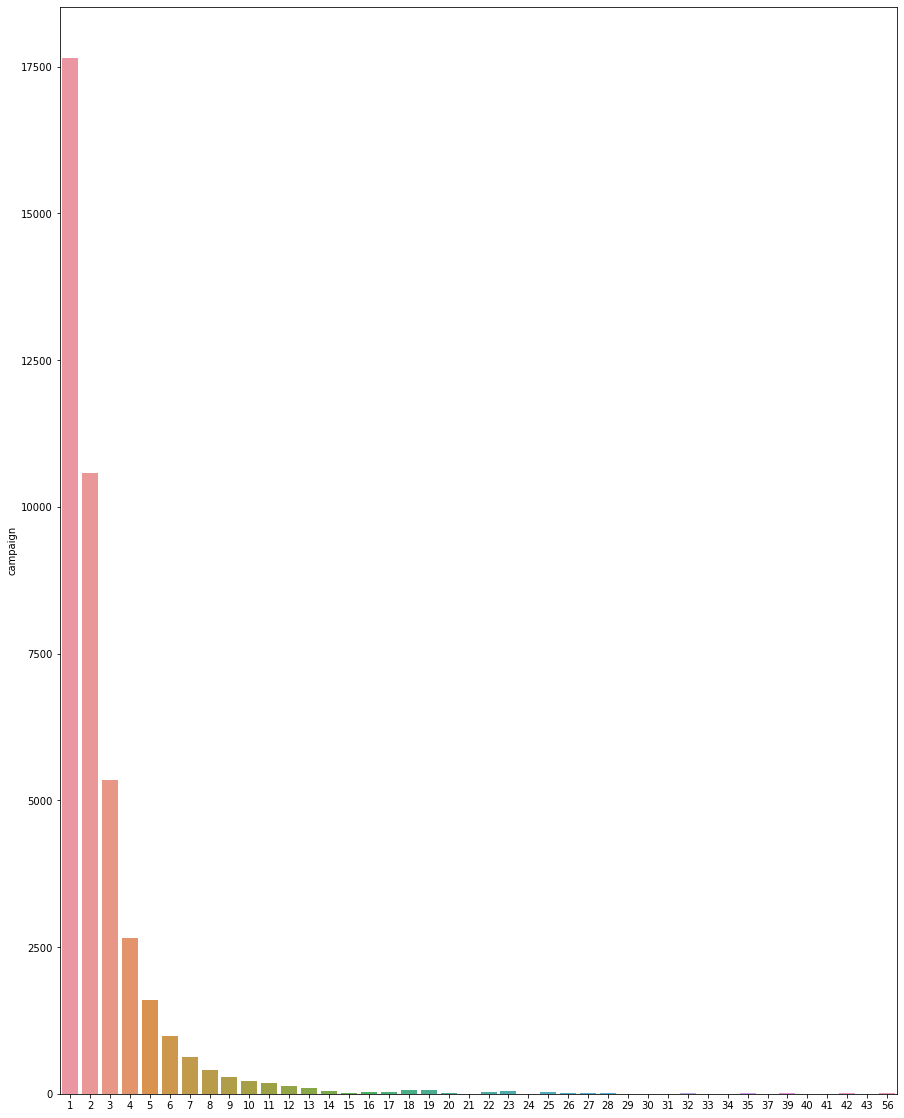

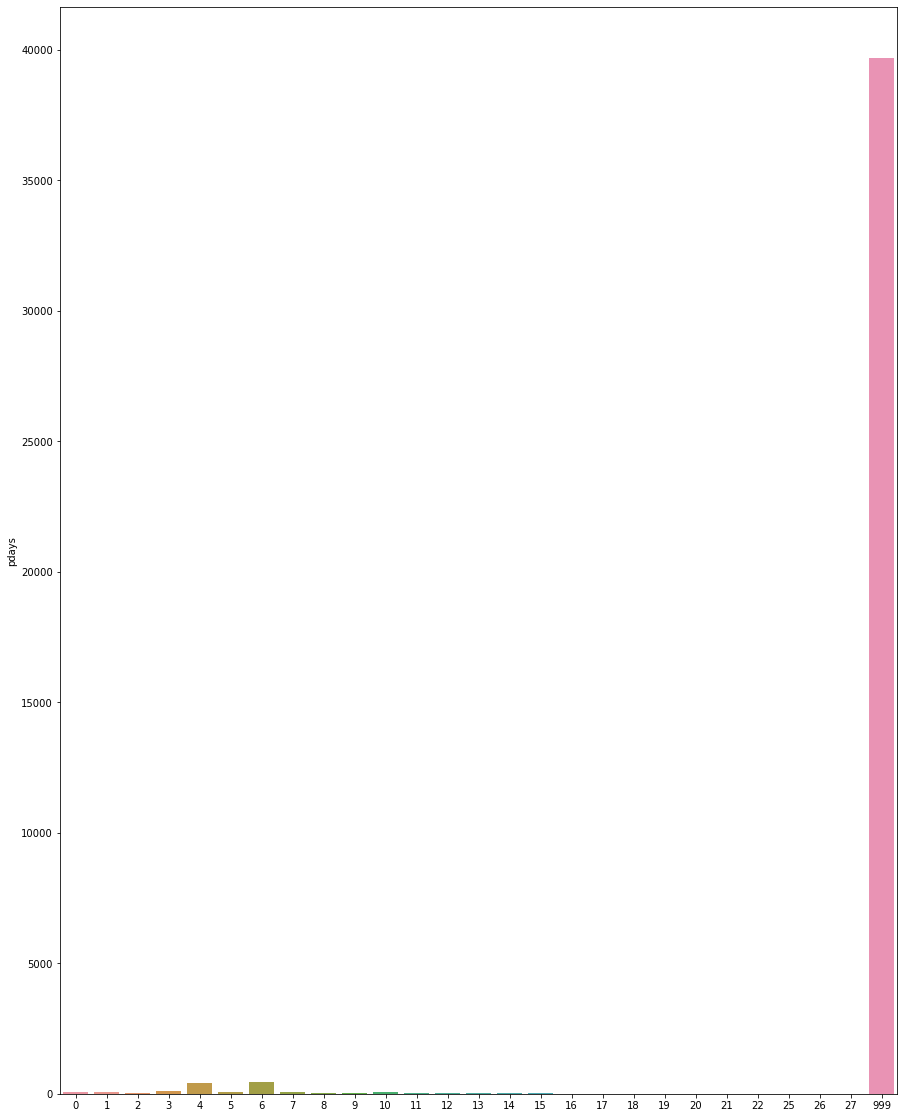

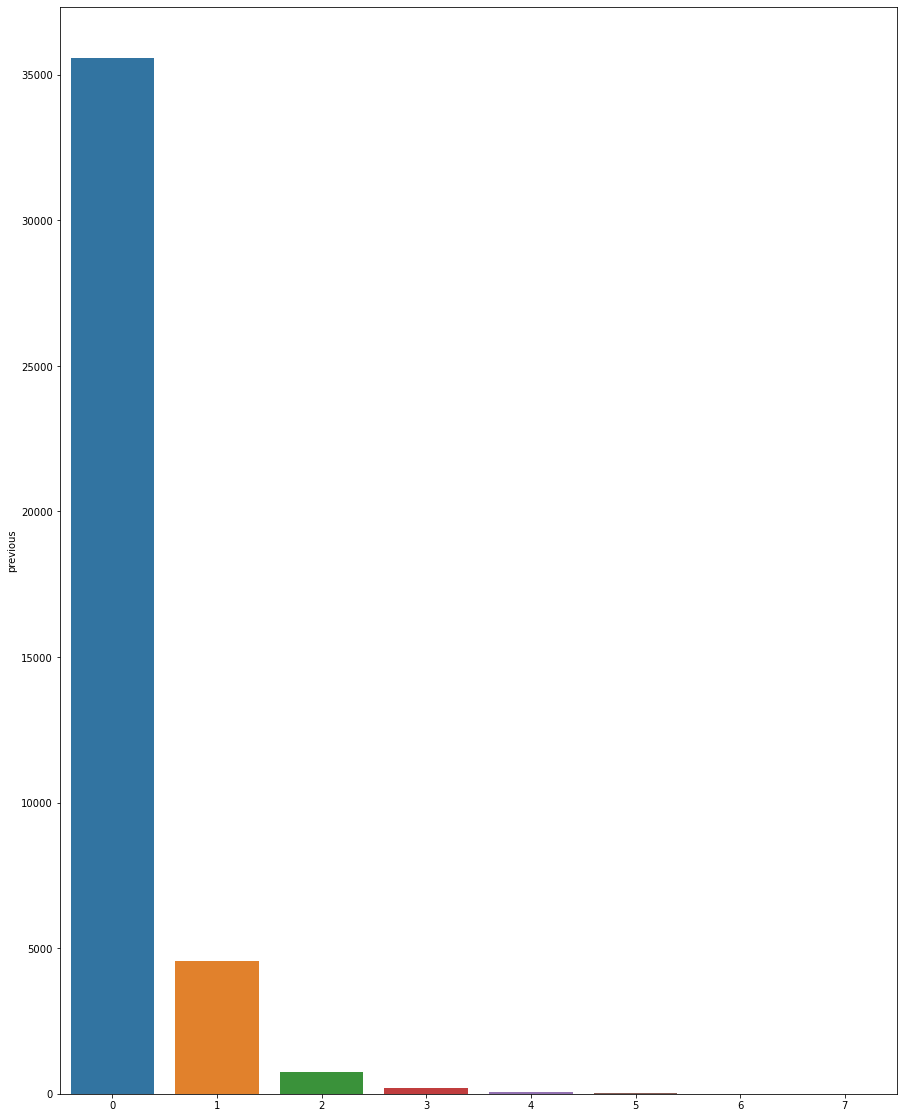

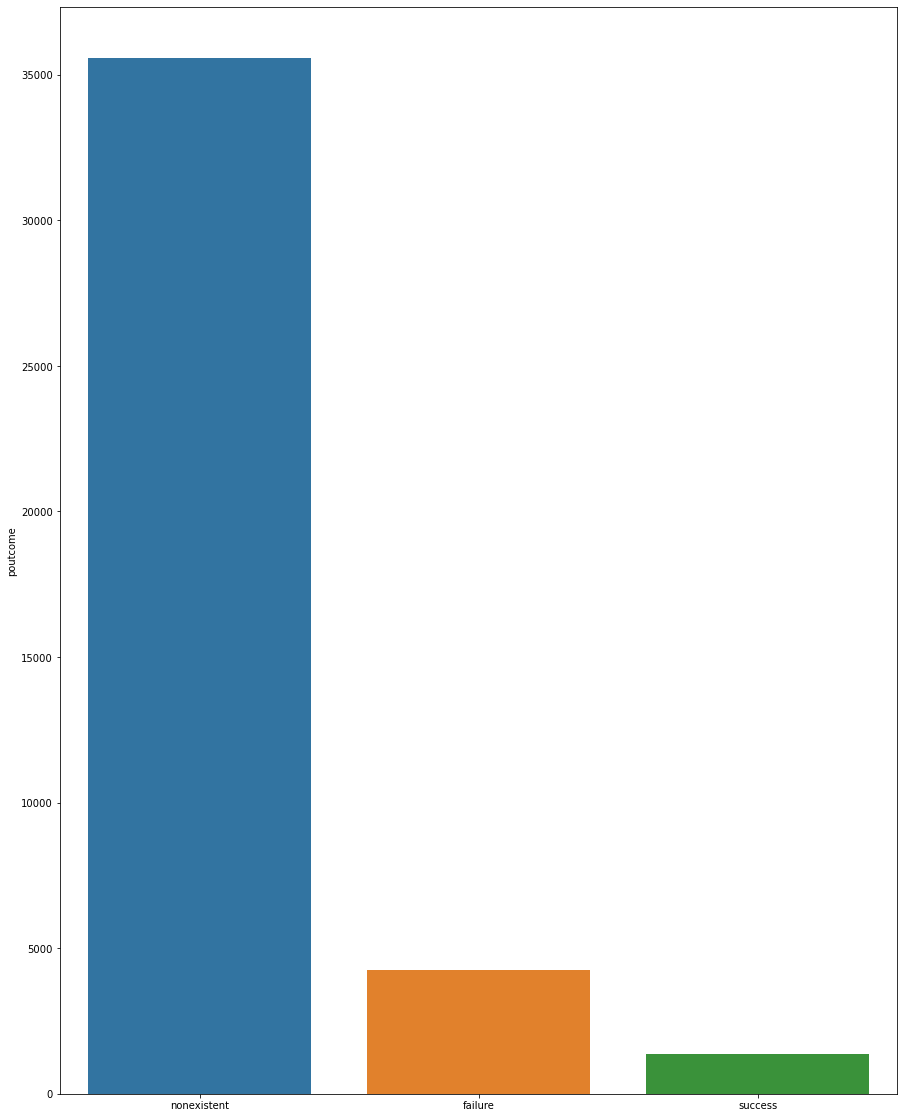

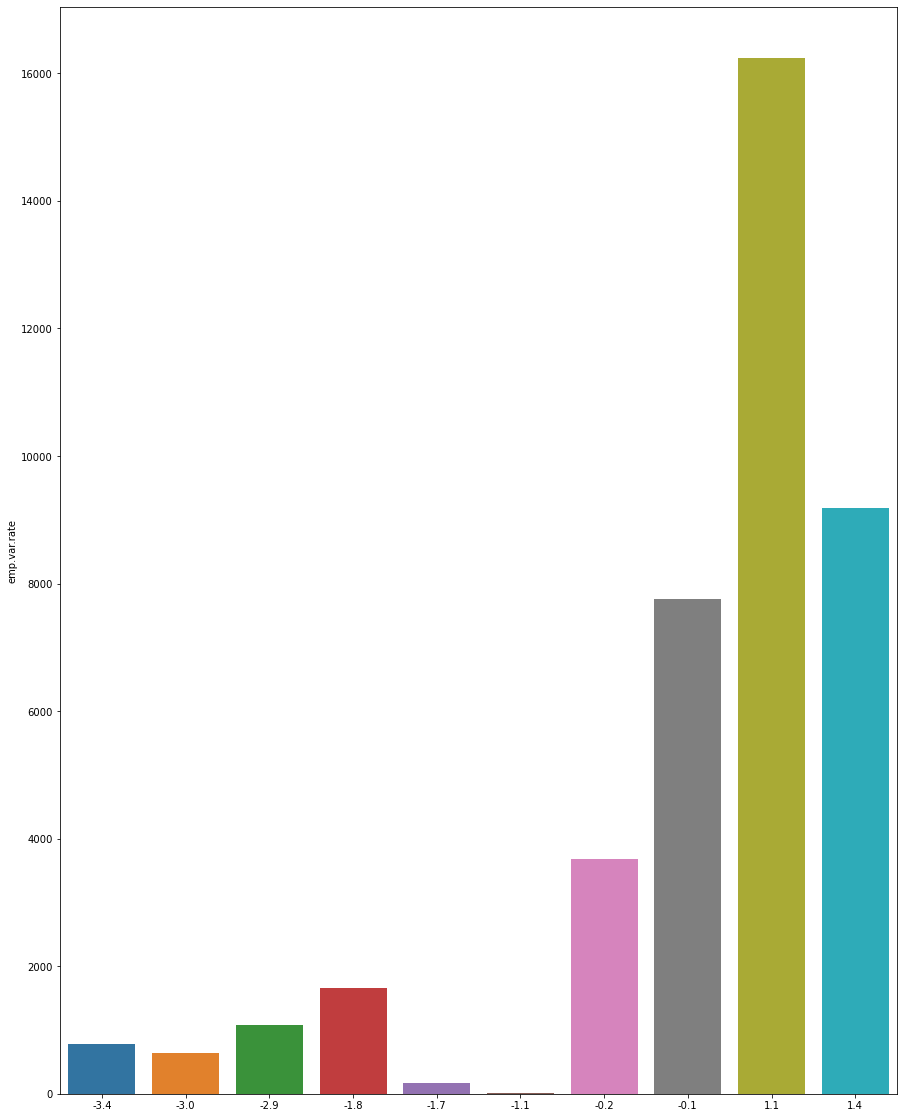

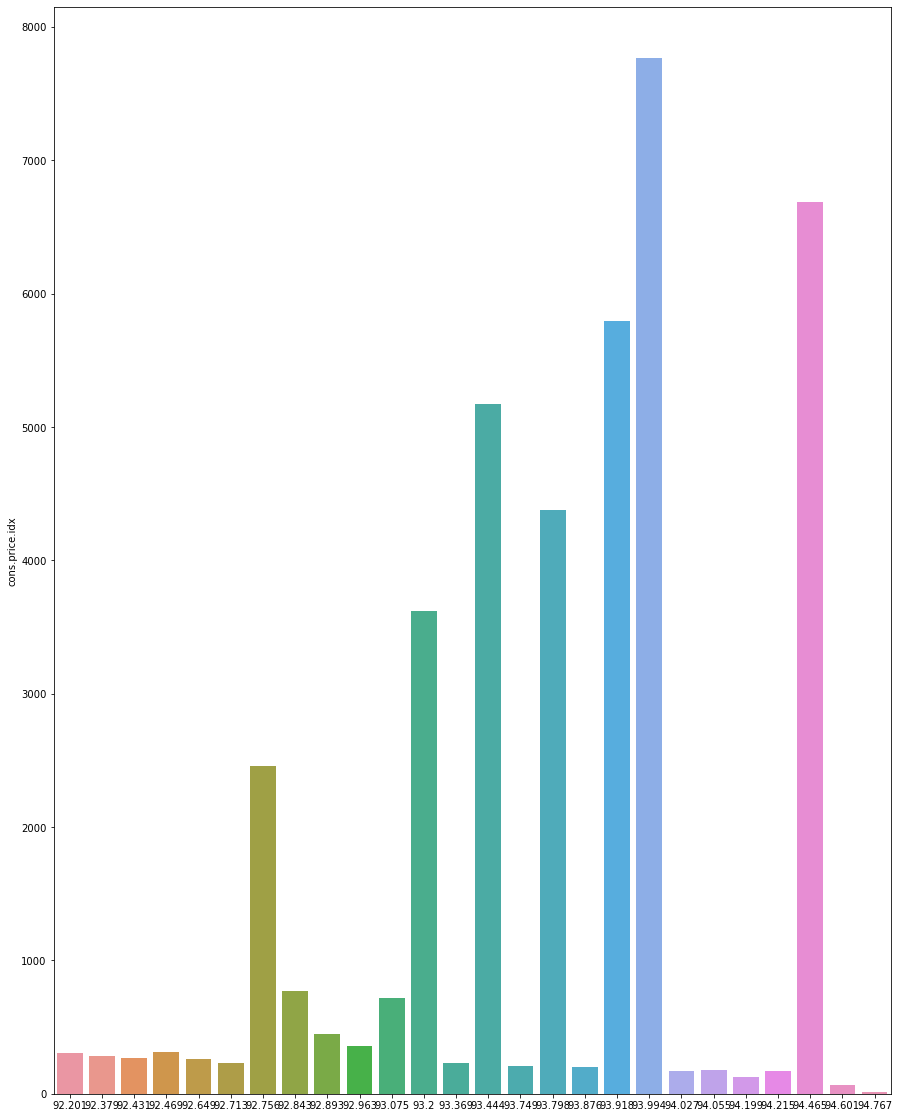

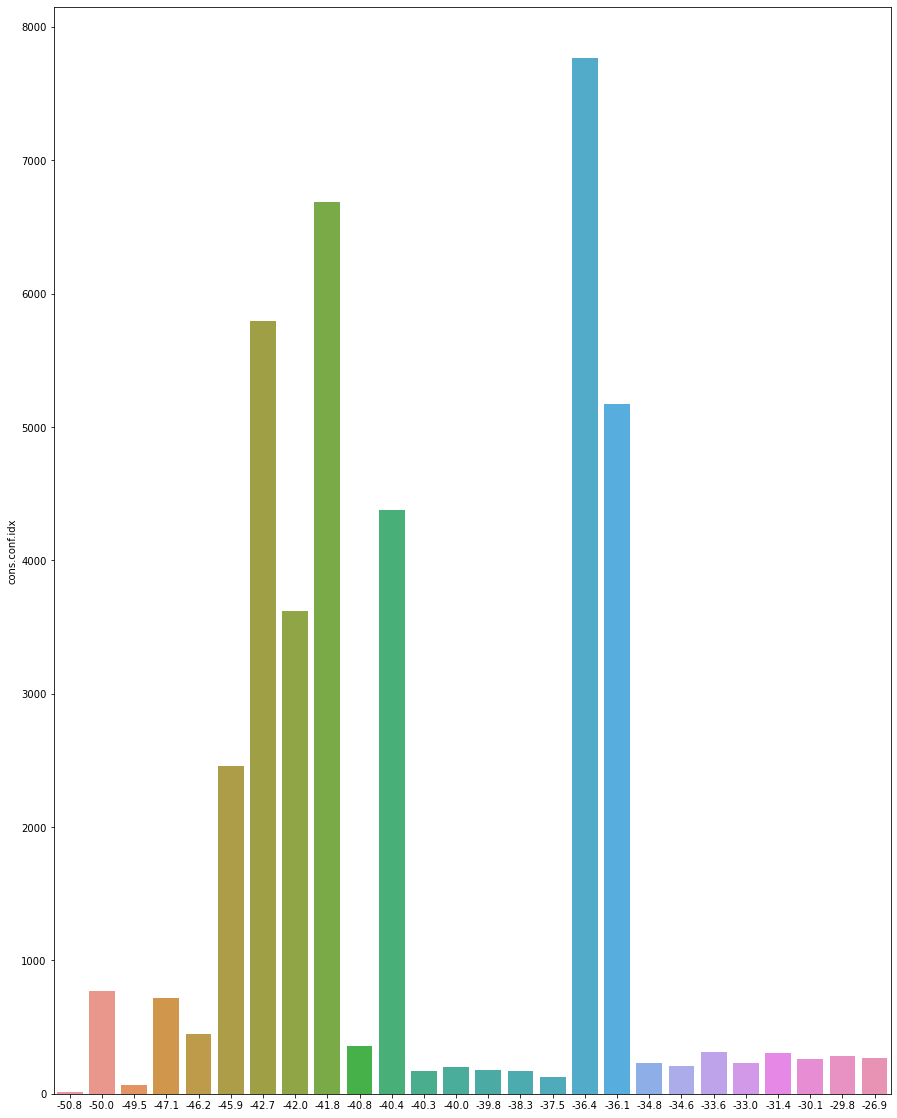

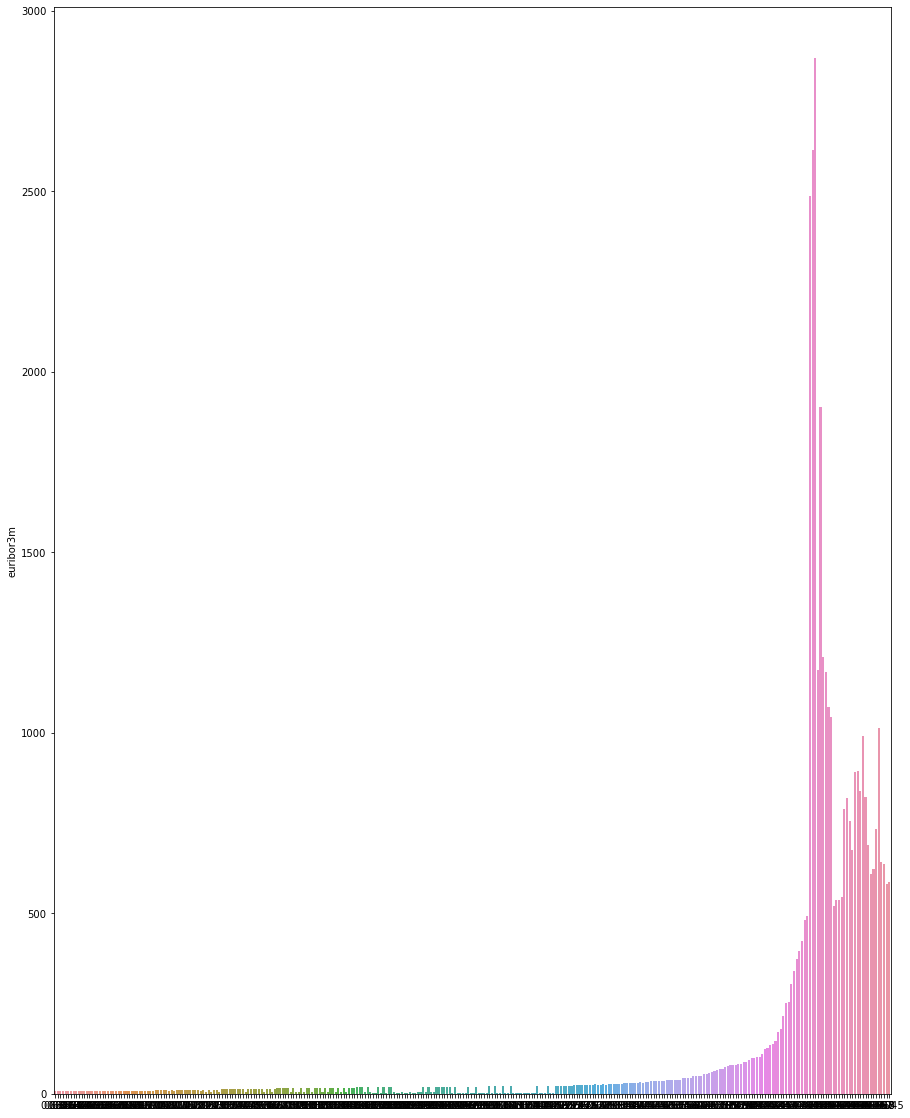

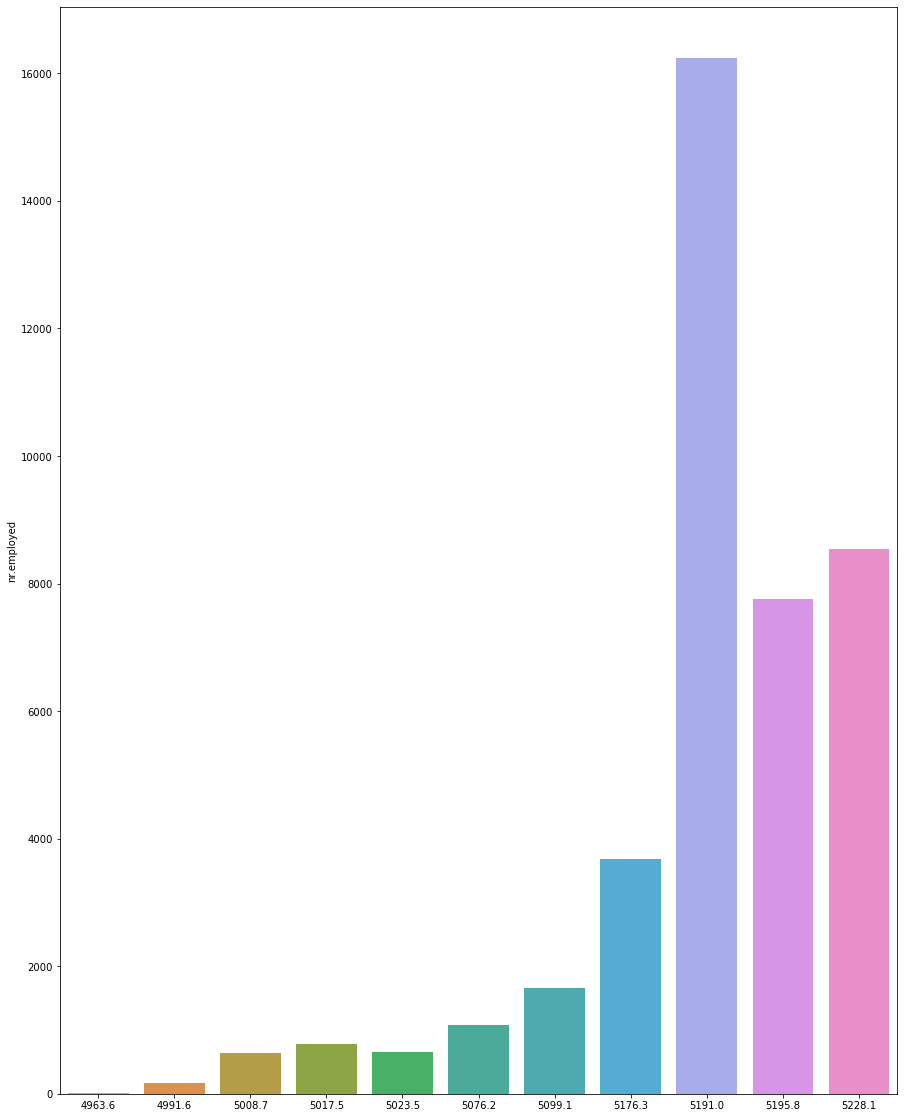

In [12]:
for i in data.columns:
    plt.figure(figsize=[15,20])
    sns.barplot(x=data[i].unique(),y=data[i].value_counts())
    plt.show()

# Inference :
1. More than 2000 people are of 75 years
2. Most of them are married and are a housemaid 
3. They have done a basic degree of 4 years and have no credit in default
4. They dont have an housing and loan
5. They are in contact thru telephone
6. They have taken the loan on may month
7. They have taken the campaign on Monday 
8. The previous outcome is non existent.
9. nr. of employees are 5195.8 

In [13]:
# Encoding the variables 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
data["default"]= le.fit_transform(data["default"])
data["housing"]= le.fit_transform(data["housing"])
data["loan"]= le.fit_transform(data["loan"])
data["contact"]= le.fit_transform(data["contact"])
data["poutcome"]= le.fit_transform(data["poutcome"])

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,0,0,0,1,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,1,0,0,1,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,0,2,0,1,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,0,0,0,1,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,0,0,2,1,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [18]:
data["marital"]= le.fit_transform(data["marital"])

In [19]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,1,basic.4y,0,0,0,1,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,services,1,high.school,1,0,0,1,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,services,1,high.school,0,2,0,1,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,1,basic.6y,0,0,0,1,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,services,1,high.school,0,0,2,1,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [20]:
data["month"]= le.fit_transform(data["month"])
data["day_of_week"]= le.fit_transform(data["day_of_week"])

In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,1,basic.4y,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,services,1,high.school,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,services,1,high.school,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,1,basic.6y,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,services,1,high.school,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [22]:
data["education"]= le.fit_transform(data["education"])
data["job"] = le.fit_transform(data["job"])

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [24]:
(y_dep.value_counts()/y_dep.value_counts().sum())*100


no     88.734583
yes    11.265417
Name: y, dtype: float64

In [25]:
# The above mentioned data is an imbalanced dataset and we have to do oversampling

# Over Sampling 

In [26]:
from imblearn.over_sampling import SMOTE 

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
x_train,x_test,y_train,y_test = train_test_split(data,y_dep,test_size=0.3)

In [29]:
sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state = 100) 


In [30]:
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mm = MinMaxScaler()

In [33]:
X_train_res = mm.fit_transform(X_train_res)
x_test = mm.transform(x_test)

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC()

In [36]:
svc.fit(X_train_res,y_train_res)

SVC()

In [37]:
train_pred = svc.predict(X_train_res)

In [38]:
test_pred = svc.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
acc_train = accuracy_score(y_train_res,train_pred)
acc_test = accuracy_score(y_test,test_pred)
print(acc_train)
print(acc_test)

0.9045852384062704
0.8955248037549567


In [41]:
# Performing Grid Search CV


In [42]:
import warnings

warnings.filterwarnings('ignore')

# Performing Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
svc_params = [{"C" :[1,0.5,0.05],"kernel" : ('linear', 'poly', 'rbf', 'sigmoid')}]

clf = GridSearchCV(svc, svc_params, cv = 2)

clf.fit(X_train_res, y_train_res)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [1, 0.5, 0.05],
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}])

In [45]:
print(clf.best_params_)

{'C': 1, 'kernel': 'poly'}


In [46]:
 #  Model after Tuning 


In [62]:
svc1 = SVC(C=1,kernel = "poly")

In [63]:
svc1.fit(X_train_res,y_train_res)

SVC(C=1, kernel='poly')

In [64]:
train_pred1 = svc1.predict(X_train_res)

In [65]:
test_pred1 = svc1.predict(x_test)

In [66]:
acc_train1 = accuracy_score(y_train_res,train_pred1)
acc_test1 = accuracy_score(y_test,test_pred1)
print(acc_train1)
print(acc_test1)

0.9082952318745918
0.8971433195759488


In [73]:
from sklearn.metrics import confusion_matrix,precision_score

In [68]:
print(confusion_matrix(y_test,test_pred1))

[[10188   843]
 [  428   898]]


In [71]:
# Senstitivity 


In [70]:
cm4 = confusion_matrix(y_test,test_pred1)
sensitivity_test = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print(sensitivity_test)

0.9235790046233342


In [79]:
# Precision Score 
P_sc = cm4[0,0]/(cm4[0,0]+cm4[1,1])
print(P_sc)

0.9189969330687353


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

          no       0.96      0.92      0.94     11031
         yes       0.52      0.68      0.59      1326

    accuracy                           0.90     12357
   macro avg       0.74      0.80      0.76     12357
weighted avg       0.91      0.90      0.90     12357



In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res,train_pred1))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     25517
         yes       0.86      0.87      0.86     12758

    accuracy                           0.91     38275
   macro avg       0.90      0.90      0.90     38275
weighted avg       0.91      0.91      0.91     38275



# Conclusion

This further says that the model is performing well it has 90% accuracy. 